In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sys
sys.path.append('../')
from utils import matplotlib_setup
from os.path import join
from collections import defaultdict
import pandas as pd
from glob import glob
%matplotlib inline


In [3]:
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
markers = ['>','*','<','o','^']
LINEWIDTH = 12
MSIZE = 40
MEDGESIZE = 12

In [4]:
def plot_bars(dt_bars, rf_bars, cnn_bars):
    
    matplotlib_setup( fontsize=35)

    # set width of bar
    barWidth = 0.15

    # Set position of bar on X axis
    r1 = np.arange(len( dt_bars))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    # Make the plot
    fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(18,6))
    ax.grid(linewidth=3,axis='y', color='grey')
    plt.bar(r1, dt_bars,  width=barWidth, edgecolor='white', label='Decision Tree', hatch=patterns[0])
    plt.bar(r2,  rf_bars, width=barWidth, edgecolor='white', label='Random Forest',hatch=patterns[1])
    plt.bar(r3,  cnn_bars,  width=barWidth, edgecolor='white', label='CNN',hatch=patterns[2])
 
    # Add xticks on the middle of the group bars
    plt.xticks([r + barWidth for r in range(len( dt_bars))], ['NS', 'FFS', 'SFS', 'SGS', 'SRS'])
    
    # Create legend & Show graphic
    plt.legend(ncol=3,fancybox=True, framealpha=0.3)
    plt.tight_layout()
    return plt

In [5]:
batch_sizes = [16,64,256,1024, 4096]
inference_times =np.array([
63538.50507,
26888.83943,
16541.77432,
14269.87075,
13756.47182])


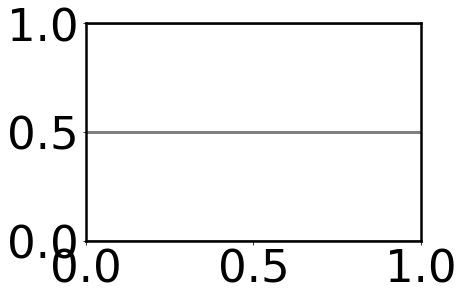

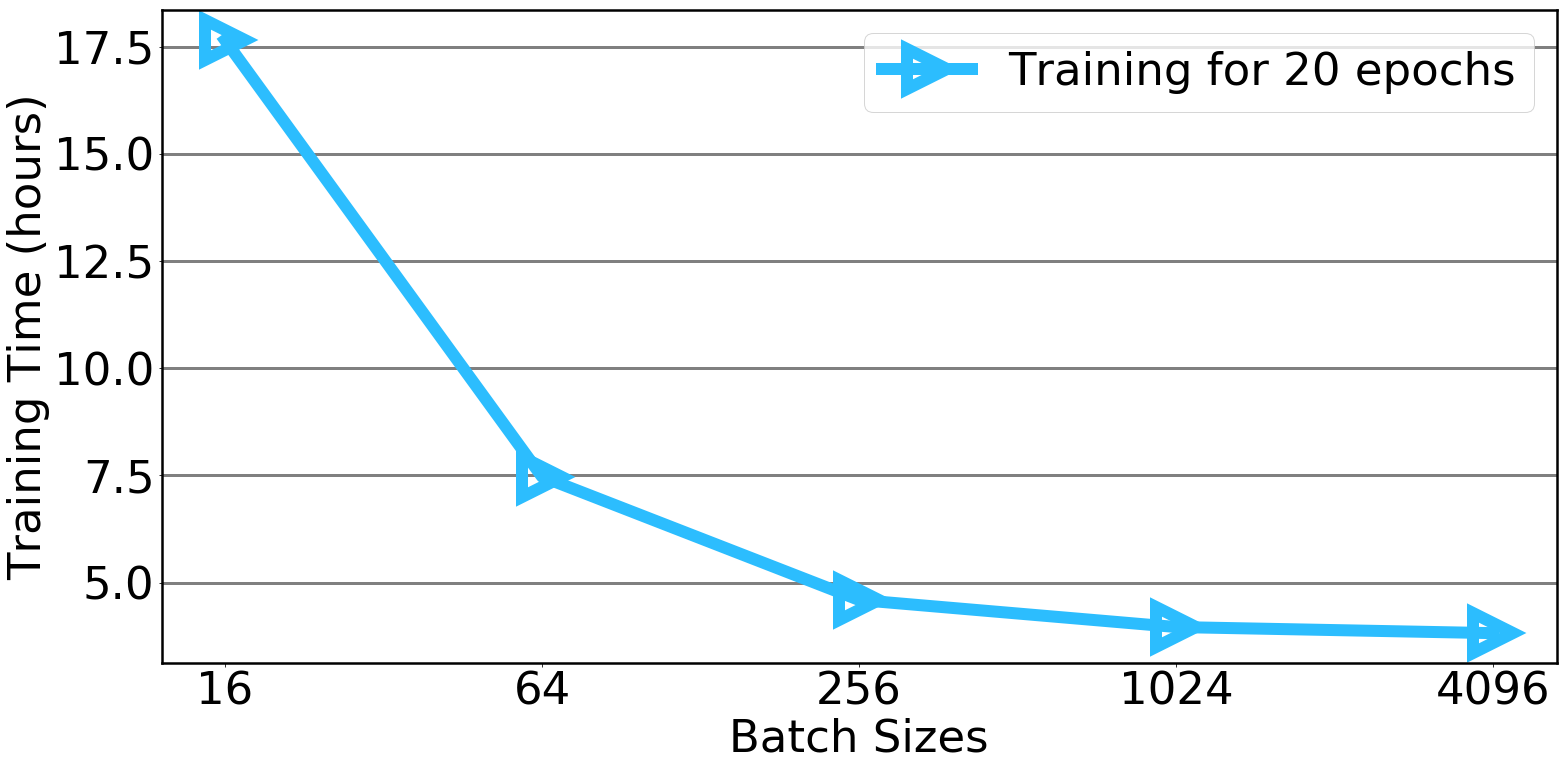

In [28]:
dataroot = '/data/juma/data/ids18'
x_indices = np.arange(len(batch_sizes))

matplotlib_setup()    
fig, ax = plt.subplots(nrows=1,ncols=1,sharex=False,figsize=(25,12))
ax.plot(x_indices,inference_times/(60*60),label='Training for 20 epochs',linewidth=LINEWIDTH,marker=markers[0],markersize=MSIZE,\
        markeredgewidth=MEDGESIZE,markerfacecolor='none')

plt.grid(linewidth=3,axis='y', color='grey')
plt.ylabel('Training Time (hours)')
plt.ylim()
#plt.plot(x_indices, inference_times, linewidth = 10,   label='Decision Tree')
plt.xticks(x_indices, batch_sizes)
plt.xlabel("Batch Sizes")
plt.legend()
plt.savefig(join(dataroot,'training_time_per_batch_size.png'))

In [6]:
import pandas as pd
df = pd.DataFrame({'bs':batch_sizes,'inference_times':inference_times})
df

,bs,inference_times
0,16,63538.50507
1,64,26888.83943
2,256,16541.77432
3,1024,14269.87075
4,4096,13756.47182


In [8]:
%load_ext rpy2.ipython

In [9]:
%%R 
library (tibble)
library(dplyr)
library(forcats)
library(tidyr)
library(purrr)
library(psych)
library(stringr)
library(ggplot2)
library(ggridges)
library(viridis)

THEME_DEFAULT <- theme_bw(
    base_size=10,
    base_family='Arial'
) +
theme(
    axis.title.x=element_text(colour="grey20",size=13,angle=0,hjust=.5,vjust=.5, face="bold"),
    axis.title.y=element_text(colour="grey20",size=13,angle=90,hjust=.5,vjust=1, face="bold"),
    axis.text.x=element_text(colour="grey20",size=11,angle=0,hjust=.5,vjust=.5),
    axis.text.y=element_text(colour="grey20",size=11,angle=0,hjust=.5,vjust=.5),
    strip.text.x=element_text(colour="grey20",size=13,angle=0,hjust=0.5,vjust=.25, face="bold"),
    strip.text.y=element_text(colour="grey20",size=13,angle=270,hjust=.5,vjust=.5, face="bold"),
    legend.title=element_text(colour="grey20",size=13,angle=0,hjust=0.5,vjust=.5,face="bold"),
    legend.position='top'
)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘ggplot2’


R[write to console]: The following objects are masked from ‘package:psych’:

    %+%, alpha


R[write to console]: Loading required package: viridisLite

